In [2]:
import pandas as pd
import numpy as np

# Índices jerárquicos

In [ ]:
index = [
    ('California', 2000), 
    ('California', 2010),
    ('New York', 2000),
    ('New York', 2010),
    ('Texas', 2000), 
    ('Texas', 2010),
]

populations = [
    33871648, 
    37253956,
    18976457,
    19378102,
    20851820,
    25145561,
]

pop = pd.Series(populations, index=index)
pop

In [ ]:
pop[('California', 2010):('Texas', 2000)]

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

---

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

In [ ]:
pop = pop.reindex(index)
pop

In [ ]:
pop[:, 2010]

---

In [ ]:
pop_df = pop.unstack()
pop_df

In [ ]:
pop_df.stack()

---

In [ ]:
pop_df = pd.DataFrame({
    'total': pop,
    'under18': [
        9267089,
        9284094,
        4687374,
        4318033,
        5906301,
        6879014,
    ],
})
pop_df

In [ ]:
f_u18 = pop_df['under18'] / pop_df['total']

In [ ]:
f_u18

In [ ]:
f_u18.unstack()

---

In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}

pd.Series(data)

In [ ]:
pd.MultiIndex.from_arrays([
    ['a', 'a', 'b', 'b'],
    [1, 2, 1, 2],
])

In [ ]:
pd.MultiIndex.from_tuples([
    ('a', 1),
    ('a', 2),
    ('b', 1),
    ('b', 2),
])

In [ ]:
pd.MultiIndex.from_product([
    ['a', 'b'],
    [1, 2],
])

---

In [ ]:
pop

In [ ]:
pop.index.names = ['state', 'year']
pop

---

In [ ]:
index = pd.MultiIndex.from_product(
    [[2013, 2014], [1, 2]],
    names=['year', 'visit']
)

columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
    names=['subject', 'type']
)

In [ ]:
data = np.round(np.random.randn(4, 6), 1)

In [ ]:
data

In [ ]:
data[:, ::2]

In [ ]:
data[:, ::2] *= 10

In [ ]:
data

In [ ]:
data += 37

In [ ]:
data

In [ ]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

In [ ]:
health_data['Guido']

---

In [ ]:
pop

In [ ]:
pop['California', 2000]

In [ ]:
pop['California']

In [ ]:
pop.loc['California':'New York']

In [ ]:
pop[:, 2000]

In [ ]:
pop[pop > 22000000]

In [ ]:
pop[['California', 'Texas']]

---

In [ ]:
health_data

In [ ]:
health_data['Guido', 'HR']

In [ ]:
health_data.iloc[:2, :2]

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

---

In [ ]:
health_data

In [ ]:
data_mean = health_data.mean(level='year')

In [ ]:
data_mean

In [ ]:
data_mean = health_data.groupby('year').mean()
data_mean

In [ ]:
data_mean.groupby('type', axis=1).mean()

# Combinando datos con `concat`

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

In [ ]:
np.concatenate([x, y, z])

In [ ]:
x = [[1, 2],
     [3, 4]]

np.concatenate([x, x], axis=1)

---

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

---

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

In [ ]:
make_df('ABC', range(3))

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2])

---

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

In [ ]:
df3

In [ ]:
df4

In [ ]:
pd.concat([df3, df4], axis=1)

---

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [ ]:
x

In [ ]:
y

In [ ]:
y.index = x.index

In [ ]:
pd.concat([x, y])

In [ ]:
pd.concat([x, y], ignore_index=True)

In [ ]:
pd.concat([x, y], verify_integrity=True)

---

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [ ]:
df5

In [ ]:
df6

In [ ]:
pd.concat([df5, df6])

In [ ]:
pd.concat([df5, df6], join='outer')

In [ ]:
pd.concat([df5, df6], join='inner')

# Combinando datos con `merge` y `join`

In [ ]:
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR'],
})

df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014],
})

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3 = pd.merge(df1, df2)
df3

In [ ]:
pd.merge(df1, df2, on='employee')

In [ ]:
df4 = pd.DataFrame({
    'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve'],
})
df4

In [ ]:
pd.merge(df3, df4)

---

In [ ]:
df5 = pd.DataFrame({
    'group': ['Accounting', 'Accounting',
              'Engineering', 'Engineering',
              'HR', 'HR'],
    'skills': ['math', 'spreadsheets',
               'coding', 'linux',
               'spreadsheets', 'organization'],
})
df5

In [ ]:
df1

In [ ]:
pd.merge(df1, df5)

---

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on='employee')

In [ ]:
df3 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000],
})
df3

In [ ]:
df1

In [ ]:
pd.merge(df1, df3, left_on='employee', right_on='name')

In [ ]:
pd.merge(
    df1, df3,
    left_on='employee', 
    right_on='name',
).drop('name', axis=1)

---

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [ ]:
df1a

In [ ]:
df2a

In [ ]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

In [ ]:
df1a.join(df2a)

---

In [ ]:
df6 = pd.DataFrame({
    'name': ['Peter', 'Paul', 'Mary'],
    'food': ['fish', 'beans', 'bread'],
},columns=['name', 'food'])

df7 = pd.DataFrame({
    'name': ['Mary', 'Joseph'],
    'drink': ['wine', 'beer'],
}, columns=['name', 'drink'])

In [ ]:
df6

In [ ]:
df7

In [ ]:
pd.merge(df6, df7)

In [ ]:
pd.merge(df6, df7, how='inner')

In [ ]:
df6

In [ ]:
df7

In [ ]:
pd.merge(df6, df7, how='outer')

In [ ]:
df6

In [ ]:
df7

In [ ]:
pd.merge(df6, df7, how='left')

In [ ]:
df6

In [ ]:
df7

In [ ]:
pd.merge(df6, df7, how='right')

# Agregación y agrupamiento

In [1]:
import seaborn as sns

In [2]:
planets = sns.load_dataset('planets')

In [3]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


---

In [6]:
ran = np.random.RandomState(42)

In [7]:
ser = pd.Series(ran.rand(5))

In [8]:
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [9]:
ser.sum()

2.811925491708157

In [10]:
ser.mean()

0.5623850983416314

In [11]:
df = pd.DataFrame({'A': ran.rand(5), 'B': ran.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [12]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [13]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

---

In [14]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [15]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [16]:
planets.dropna().count()

method            498
number            498
orbital_period    498
mass              498
distance          498
year              498
dtype: int64

In [17]:
planets.dropna().sum()

method            Radial VelocityRadial VelocityRadial VelocityR...
number                                                          864
orbital_period                                        416217.777994
mass                                                     1249.64138
distance                                                   25929.97
year                                                         999674
dtype: object

---

In [18]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data': range(6),
}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [19]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


---

In [20]:
planets.groupby('method')

In [21]:
planets.groupby('method')['orbital_period']

In [22]:
planets.groupby('method')[['orbital_period']]

In [23]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [24]:
planets.groupby('method')[['orbital_period']].median()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


In [25]:
for (method, group) in planets.groupby('method'):
    print(f"{method:30} shape={group.shape}")

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [26]:
planets.groupby('method')['year'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Transit Timing Variations,4.0,2012.500000,1.290994,2011.0,2011.75,2012.5,2013.25,2014.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0


---

In [27]:
planets.groupby('method').aggregate(['min', np.median, max])

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1    1.0   1     246.360000    631.180000   
Eclipse Timing Variations          1    2.0   2    1916.250000   4343.500000   
Imaging                            1    1.0   4    4639.150000  27500.000000   
Microlensing                       1    1.0   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1    2.0   2       0.240104      0.342887   
Pulsar Timing                      1    3.0   3       0.090706     66.541900   
Pulsation Timing Variations        1    1.0   1    1170.000000   1170.000000   
Radial Velocity                    1    1.0   6       0.736540    360.200000   
Transit                            1    1.0   7       0.355000      5.714932   
Transit Timing Variations          2    2.0   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [ ]:
planets.dropna().groupby('method').aggregate({
    'mass': 'mean',
    'distance': 'max',
})

# Tarea

**1.** Describe la diferencia entre:
- *Time stamp*

Describe un momento preciso en el tiempo y se utiliza para DateTimeIndex en el manejo de series de tiempo. Es similar al tipo DateTime de python.

- *Time intervals*

Objeto inmutable que implementa un intervalo, un intervalo acotado similar a un segmento.

- *Time deltas*

Representa una duración, la diferencia entre dos fechas u horas. Timedelta es el equivalente en pandas de datetime.timedelta de python y es intercambiable con él en la mayoría de los casos.

¿Qué métodos y funciones tiene Pandas para trabajar con estos conceptos?
Escribe ejemplos ilustrativos.

In [16]:
mi_cumple = pd.Timestamp(2022, 2, 20, 6)
mi_cumple.day_of_week
mi_cumple.is_leap_year


un_año = pd.Interval(pd.Timestamp('2017-01-01 00:00:00'), 
                        pd.Timestamp('2018-01-01 00:00:00'),
                        closed='left')
un_año.mid
un_año.length


td = pd.Timedelta(10, "d")
td.days
td.total_seconds



<function Timedelta.total_seconds>

**2.** Escribe ejemplos ilustrativos de la función `datetime` del módulo `datetime`, de la función `parser` del módulo `dateutil` y del método `strftime` de los objetos `datetime`.

In [35]:
from datetime import datetime

dt = datetime.now()
dt.year
dt.month
dt.day

from dateutil import parser

print(parser.parse('2022/12/01'))
print(parser.parse('december 01, 2022'))


dt.strftime("%d/%m/%y")
dt.strftime("%A %d. %B %Y")
dt.strftime("%A %d %B %Y %I:%M")

2022-12-01 00:00:00
2022-12-01 00:00:00


'Thursday 01 December 2022 02:34'

**3.** Revisa los siguientes fragmentos de código y describe qué operaciones trabajan con tiempo y qué hacen estas operaciones.

In [36]:
from pandas_datareader import data

In [37]:
goog = data.DataReader(
    'GOOG',
    start='2004',
    end='2016',
    data_source='yahoo',
)

In [38]:
goog

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104
...,...,...,...,...,...,...
2015-12-24,37.567501,37.331001,37.477501,37.419998,10544000.0,37.419998
2015-12-28,38.149502,37.476002,37.646000,38.125500,30306000.0,38.125500
2015-12-29,38.999001,38.321499,38.334499,38.830002,35300000.0,38.830002


In [39]:
cprice = goog['Close']

In [40]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

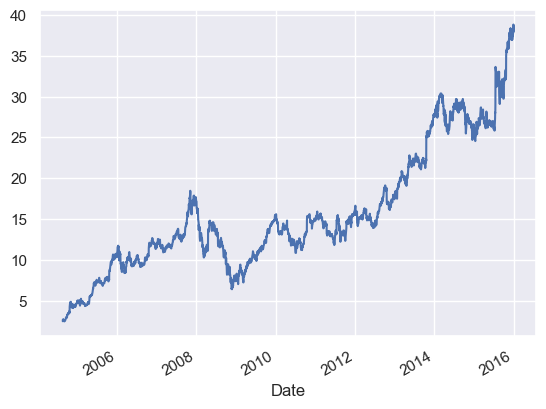

In [41]:
# Esta es una grafica de velas que necesita de una serie de tiempo para graficar el eje de Fechas
cprice.plot();

In [42]:
# esta operación se ejecuta a traves de ejes de tiempo (no numericos) y utilizan el date stamp como indice para promedias los valores al cierre del año.
resampled = cprice.resample('BA').mean()
resampled

Date
2004-12-31     3.780860
2005-12-30     6.918047
2006-12-29    10.241246
2007-12-31    13.418465
2008-12-31    11.577904
2009-12-31    10.951161
2010-12-31    13.340574
2011-12-30    14.171237
2012-12-31    16.010401
2013-12-31    22.023519
2014-12-31    27.990164
2015-12-31    30.100284
2016-12-30          NaN
Freq: BA-DEC, Name: Close, dtype: float64

In [44]:
freq = cprice.asfreq('BA')
freq

Date
2004-12-31     4.801752
2005-12-30    10.332770
2006-12-29    11.469011
2007-12-31    17.222446
2008-12-31     7.662529
2009-12-31    15.441621
2010-12-31    14.793799
2011-12-30    16.087200
2012-12-31    17.618462
2013-12-31    27.913124
2014-12-31    26.247936
2015-12-31    37.944000
Freq: BA-DEC, Name: Close, dtype: float64

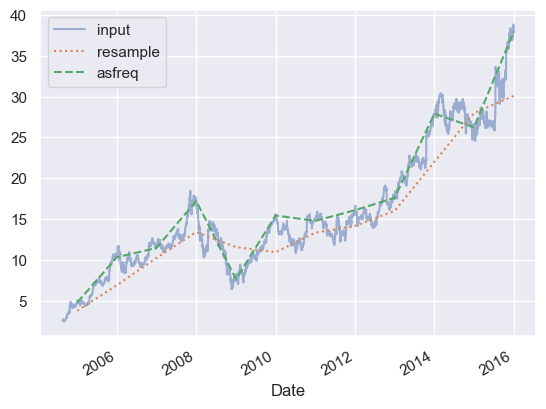

In [45]:
cprice.plot(alpha=0.5, style='-')
resampled.plot(style=':')
freq.plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

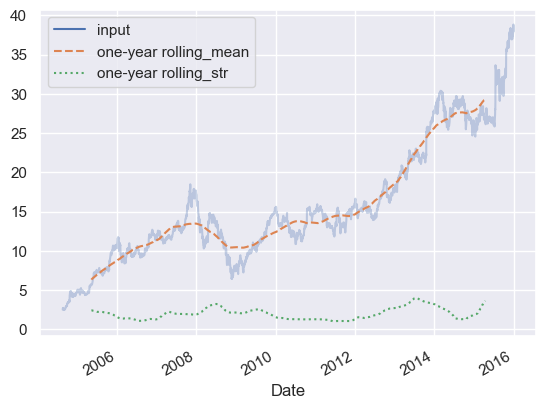

In [46]:
rolling = cprice.rolling(365, center=True)
data = pd.DataFrame({
    'input': cprice,
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_str': rolling.std(),
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3);